#Importing Libraries

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout,Conv2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation

import joblib
import time
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import load_model

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from tensorflow.keras.models import Sequential

# Loading Train Data

In [3]:
DATADIR= "/content/drive/MyDrive/Ai Training MetaPi/Week_6_Deep_Learning/W6_D5_dataset/Sir_mri_dataset/Training" # G-drive

In [5]:
IMG_SIZE=180

In [6]:
categories=['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

In [10]:
from tqdm import tqdm
data=[]
def create_data():
  for category in categories:
    path=os.path.join(DATADIR,category)
    class_num=categories.index(category)
    print (path)
    for img in tqdm(os.listdir(path)):
      try:
        img_array=cv2.imread(os.path.join(path,img))
        new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
        data.append([new_array, class_num])
      except Exception as e:
        pass
create_data()

/content/drive/MyDrive/Ai Training MetaPi/Week_6_Deep_Learning/W6_D5_dataset/Sir_mri_dataset/Training/glioma_tumor


100%|██████████| 826/826 [00:11<00:00, 70.41it/s] 


/content/drive/MyDrive/Ai Training MetaPi/Week_6_Deep_Learning/W6_D5_dataset/Sir_mri_dataset/Training/meningioma_tumor


100%|██████████| 822/822 [00:11<00:00, 70.72it/s] 


/content/drive/MyDrive/Ai Training MetaPi/Week_6_Deep_Learning/W6_D5_dataset/Sir_mri_dataset/Training/no_tumor


100%|██████████| 395/395 [00:04<00:00, 81.40it/s] 


/content/drive/MyDrive/Ai Training MetaPi/Week_6_Deep_Learning/W6_D5_dataset/Sir_mri_dataset/Training/pituitary_tumor


100%|██████████| 827/827 [00:12<00:00, 68.20it/s] 


In [11]:
np.shape(data)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


(2870, 2)

In [12]:
X=[]
Y=[]
for features,labels in tqdm(data):
  X.append(features)
  Y.append(labels)

100%|██████████| 2870/2870 [00:00<00:00, 838159.90it/s]


In [13]:
X=np.array(X)
Y=np.array(Y)

In [14]:
X.shape, Y.shape

((2870, 180, 180, 3), (2870,))

# Loading Test Data

In [15]:
test_DATADIR= "/content/drive/MyDrive/Ai Training MetaPi/Week_6_Deep_Learning/W6_D5_dataset/Sir_mri_dataset/Testing"

In [16]:
from tqdm import tqdm
data_test=[]
def create_data_test():
  for category in categories:
    path=os.path.join(test_DATADIR,category)
    class_num=categories.index(category)
    print (path)
    for img in tqdm(os.listdir(path)):
      try:
        img_array=cv2.imread(os.path.join(path,img))
        new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
        data_test.append([new_array, class_num])
      except Exception as e:
        pass
create_data_test()

/content/drive/MyDrive/Ai Training MetaPi/Week_6_Deep_Learning/W6_D5_dataset/Sir_mri_dataset/Testing/glioma_tumor


100%|██████████| 100/100 [00:01<00:00, 80.58it/s]


/content/drive/MyDrive/Ai Training MetaPi/Week_6_Deep_Learning/W6_D5_dataset/Sir_mri_dataset/Testing/meningioma_tumor


100%|██████████| 115/115 [00:01<00:00, 100.78it/s]


/content/drive/MyDrive/Ai Training MetaPi/Week_6_Deep_Learning/W6_D5_dataset/Sir_mri_dataset/Testing/no_tumor


100%|██████████| 105/105 [00:01<00:00, 71.20it/s]


/content/drive/MyDrive/Ai Training MetaPi/Week_6_Deep_Learning/W6_D5_dataset/Sir_mri_dataset/Testing/pituitary_tumor


100%|██████████| 74/74 [00:15<00:00,  4.65it/s]


In [17]:
np.shape(data_test)

(394, 2)

In [18]:
X_test=[]
Y_test=[]
for features_t,labels_t in tqdm(data_test):
  X_test.append(features_t)
  Y_test.append(labels_t)

100%|██████████| 394/394 [00:00<00:00, 802991.14it/s]


In [19]:
X_test=np.array(X_test)
Y_test=np.array(Y_test)

In [20]:
x_train= X
y_train= Y

x_test=X_test
y_test=Y_test


In [21]:
#Scaling data
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [22]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from tensorflow.keras.models import Sequential

# Define the CNN model
model = Sequential()

# First convolutional layer
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='Same', activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(filters=128,kernel_size=(3,3),padding='Same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(4, activation='softmax'))

# Build the model
model.build(input_shape=(None, IMG_SIZE, IMG_SIZE, 3))

In [24]:
# Build the model
model.build(input_shape=(None, IMG_SIZE, IMG_SIZE, 3))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 180, 180, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 128)       0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 259200)            0         
                                                                 
 dense (Dense)               (None, 512)               1

In [25]:
S=time.time()
history=model.fit(x_train, y_train, batch_size=128,epochs=10, validation_data=(x_test,y_test))
E=time.time()

Epoch 1/10
23/23 [==============================] - 21s 331ms/step - loss: 3.6348 - accuracy: 0.4934 - val_loss: 1.9816 - val_accuracy: 0.3198
Epoch 2/10
23/23 [==============================] - 5s 222ms/step - loss: 0.6912 - accuracy: 0.7251 - val_loss: 2.6258 - val_accuracy: 0.5127
Epoch 3/10
23/23 [==============================] - 5s 224ms/step - loss: 0.4049 - accuracy: 0.8439 - val_loss: 2.1515 - val_accuracy: 0.6294
Epoch 4/10
23/23 [==============================] - 5s 229ms/step - loss: 0.2123 - accuracy: 0.9303 - val_loss: 2.8057 - val_accuracy: 0.6853
Epoch 5/10
23/23 [==============================] - 5s 221ms/step - loss: 0.0893 - accuracy: 0.9725 - val_loss: 3.6119 - val_accuracy: 0.7005
Epoch 6/10
23/23 [==============================] - 5s 232ms/step - loss: 0.0575 - accuracy: 0.9829 - val_loss: 4.3115 - val_accuracy: 0.7208
Epoch 7/10
23/23 [==============================] - 5s 226ms/step - loss: 0.0228 - accuracy: 0.9944 - val_loss: 5.0912 - val_accuracy: 0.7183
Epoch

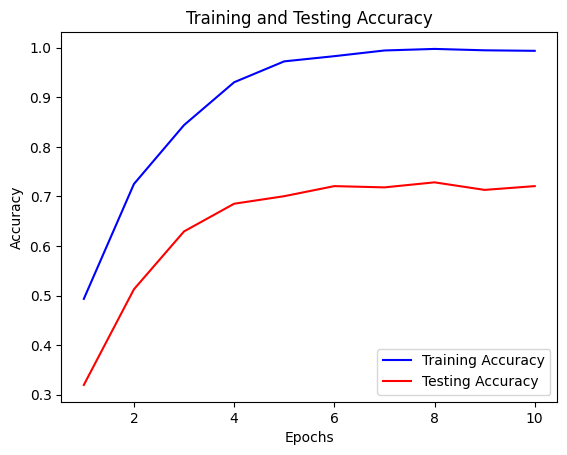

In [26]:
# Collect training and testing accuracy values
training_accuracy = history.history['accuracy']
testing_accuracy = history.history['val_accuracy']

# Create a plot
epochs = range(1, len(training_accuracy) + 1)

plt.plot(epochs, training_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, testing_accuracy, 'r', label='Testing Accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Saving the model

In [28]:
model.save("/content/drive/MyDrive/Ai Training MetaPi/Week_6_Deep_Learning/W6_D5_dataset/save_model.history.h5")

# Next Code run on my Local Machine

# GUI

In [8]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import numpy as np
import tensorflow as tf

# Load the model using tf.keras instead of keras
model = tf.keras.models.load_model('G://My Drive\\Ai Training MetaPi\\Week_6_Deep_Learning\\W6_D5_dataset\\save_modeI\\history.h5')

root = tk.Tk()
root.title('MRI Dataset')

def classify_image():
    file_path = filedialog.askopenfilename(filetypes=[("Image files", "*.jpg *.jpeg")])
    if file_path:
        image = Image.open(file_path).convert("L").resize((20, 20))  # Resize to 20x20 grayscale
        image_array = np.array(image)

        # Replicate grayscale channel into three channels
        image_array_rgb = np.stack([image_array] * 3, axis=-1)
        image_array_rgb = image_array_rgb / 255.0

        image_array_rgb = image_array_rgb.reshape(1, 20, 20, 3)  # Reshape for model's input

        prediction = model.predict(image_array_rgb)
        predicted_digit = np.argmax(prediction)
        if predicted_digit==0:
            predicted_digit='Gloma Tumor'
        elif predicted_digit==1:
            predicted_digit='Meningioma Tumor'
        elif predicted_digit==2:
            predicted_digit='No Tumor'
        elif predicted_digit==3:
            predicted_digit='Petituray Tumor'

        photo = ImageTk.PhotoImage(image=Image.fromarray((image_array_rgb[0] * 255).astype(np.uint8)))
        image_label.config(image=photo)
        image_label.image = photo
        result_label.config(text=f'Predicted Class: {predicted_digit}')

open_button = tk.Button(root, text="Open Image", command=classify_image)
image_label = tk.Label(root,width=80,height=80)
result_label = tk.Label(root, text="Predicted Class: ")

open_button.pack(pady=10)
image_label.pack()
result_label.pack()

root.mainloop()

1/1 [==============================] - 0s 104ms/step


# InterFace of the GUI

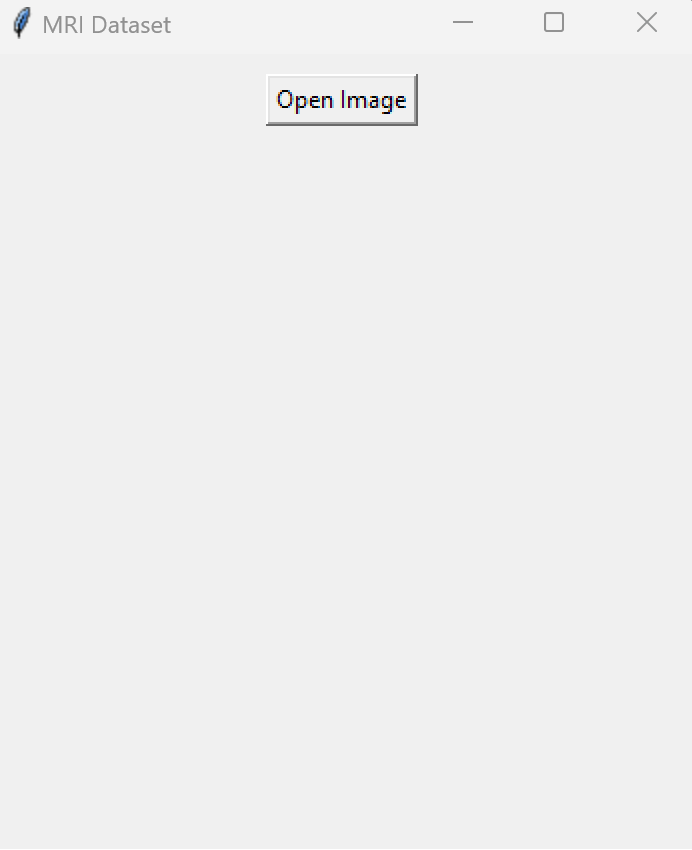

# Output

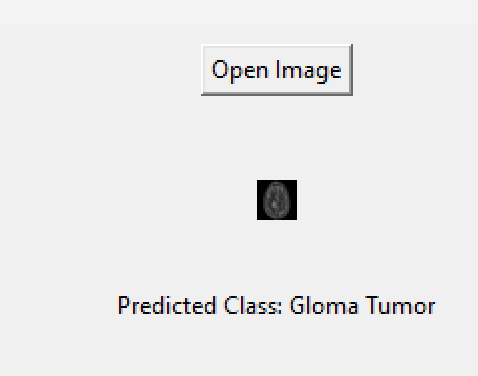

# **Steps followed:**

- Imported essential libraries for image processing, machine learning, and GUI development.
- Loaded and preprocessed training and testing datasets containing glioma, meningioma, no tumor, and pituitary tumor images.
- Resized and scaled images to prepare them for CNN model training.
- Designed a CNN architecture with convolutional, max-pooling, and fully connected layers.
- Built and compiled the model with appropriate loss and optimization functions.
- Trained the model on the training dataset, achieving high accuracy.
- Saved the trained model for future use.
- Developed a user-friendly GUI using tkinter to classify MRI images and display predicted tumor types on the interface.

# **Insights**

**Data Preprocessing:**
- Preprocessing the dataset through resizing and scaling is critical for ensuring uniformity and enhancing model performance.

**CNN Effectiveness:**
- The CNN architecture, with convolutional and pooling layers, proved effective in extracting relevant features from medical images.

**Model Assessment:**
- Evaluating the model's accuracy on the testing dataset provided a clear measure of its performance in classifying brain tumors.

**Visual Learning Progress:**
- The training history plot visually represented the model's learning process, offering insights into its training dynamics.

**User-Friendly Interface:**
- The GUI created a user-friendly interface, enabling easy upload of MRI images and quick tumor type predictions.

**Medical Utility:**
- In a medical context, this system can be valuable for preliminary diagnoses, potentially aiding healthcare professionals in making faster and more informed decisions.

**Broad Accessibility:**
- The project highlighted the seamless integration of machine learning models with graphical interfaces, making such technology accessible to a wide audience.

# **Conclusion**

In conclusion, this project demonstrated the development of a brain tumor detection system using machine learning and a graphical user interface. The steps involved data preprocessing, model creation, training, and saving, culminating in a functional GUI for end-user interaction. The system's ability to classify brain tumors into four categories provides valuable insights for medical professionals and researchers. Additionally, the GUI's user-friendly nature makes it practical for use in real-world scenarios, potentially assisting in early tumor detection and diagnosis. This project serves as an example of how technology can be harnessed to aid in critical healthcare applications.